Unit 3 - Exercises

In [5]:
# Import libraries
import pandas as pd
import plotnine as pn

In [6]:
# Create DataFrame
athletes_data = pd.read_csv('./athlete_events.csv')

Ejercicio 4

Elige 5 deportes y mira a ver la evolución de la participación femenina a lo largo de los años con un gráfico:

In [9]:
athletes_data.head(100)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,FIN,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN
97,33,Mika Lauri Aarnikka,M,28.0,187.0,76.0,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Two Person Dinghy,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN


In [11]:
female_athletes = athletes_data[athletes_data["Sex"] == "F"]

chosen_sports = ["Athletics", "Swimming", "Rowing", "Cycling", "Volleyball", "Gymnastics"]
female_athletes_by_chosen_sport = female_athletes[female_athletes["Sport"].isin(chosen_sports)].groupby("Sport")[
    "Year"].value_counts().reset_index()
female_athletes_by_chosen_sport

,Sport,Year,count
0,Athletics,2016,1208
1,Athletics,2012,1097
2,Athletics,2008,1068
3,Athletics,2000,1031
4,Athletics,2004,1001
...,...,...,...
94,Volleyball,1980,90
95,Volleyball,1984,90
96,Volleyball,1992,89
97,Volleyball,1968,87


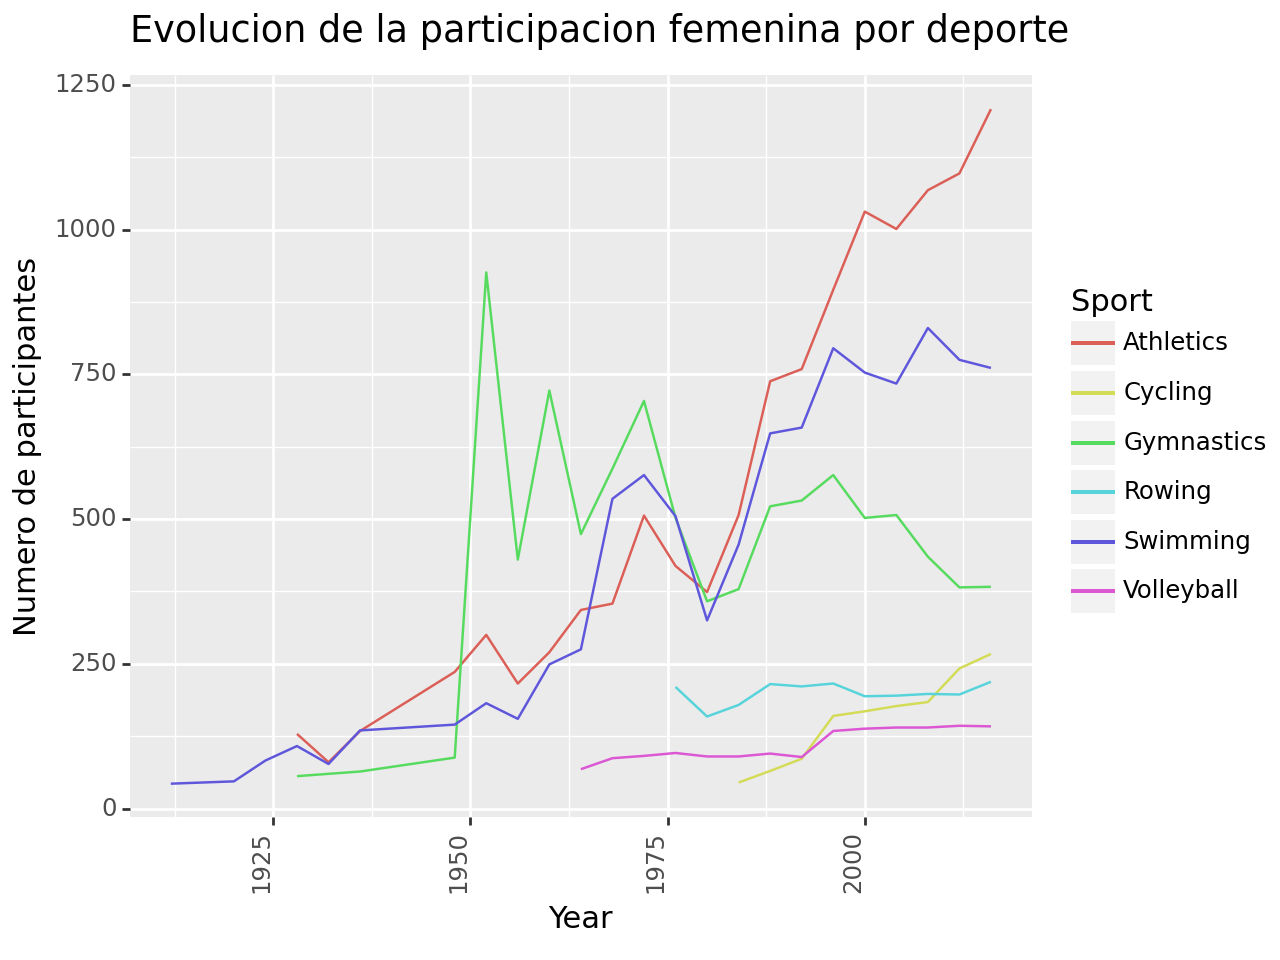

In [33]:
line_chart = (
        pn.ggplot(female_athletes_by_chosen_sport, pn.aes(**{"x": 'Year', "y": 'count', "color": "Sport"}), )
        + pn.geom_line()
        + pn.labs(x='Year', y='Numero de participantes', color='Sport')
        + pn.theme(axis_text_x=pn.element_text(rotation=90, hjust=1))
        + pn.ggtitle("Evolucion de la participacion femenina por deporte")
)

# Mostramos el gráfico
line_chart.draw()